# Cozen O'Connor Claims Recovery Analysis

## Introduction

The objective of this project is to analyze paid claim trends at Cozen O'Connor and determine the underlying causes driving these trends.

The dataset comes from an SSRS report application used in Cozen O'Connor. This dataset was created in February of 2024.

Subrogation is a legal right that allows an insurance company to recover the cost of a claim from the party responsible for the loss. The goal of subrogation is to ensure that the at-fault party or their insurance company pays for the damages. 

How does subrogation work? 
1. An insured person files a claim for a covered loss
2. The insurance company pays for the claim
3. The insurance company seeks reimbursement from the at-fault party or their insurance company

Examples of subrogation
- Auto accidents: If you're in an accident and your insurance company pays for your medical bills, they can seek reimbursement from the other driver's insurance company 
- Property damage: If your neighbor's negligence causes damage to your property, your insurance company can seek reimbursement from your neighbor

https://law.uc.edu/education/areasofstudy/litigation-alternative-dispute-resolution.html#:~:text=Litigation%20is%20generally%20thought%20of,information%2C%20courtroom%20trial%20and%20appeal.

Litigation - the process of going to court to settle a dispute, from filing a law suit through arguments on legal motions, a discovery phase involving formal exchange of information, courtroom trial and appeal

https://www.zadehfirm.com/library/what-is-commercial-litigation-.cfm

Common cases reported under the definition of business litigation are:
- Breach of Contract
- Fraud
- Misrepresentation
- Wrongful Discharge
- Abuse of Process
- Deceptive Trade Practices
- Criminal Conversion
- Fiduciary Duty Abuse
- Breach Of Warranty

Litigation process
1. Pleadings: The initial documents that outline the claims of each side 
2. Discovery: The process of exchanging information and evidence between the parties 
3. Motions: Requests made by either party to the court 
4. Trial: The presentation of evidence and arguments to a judge or jury 
5. Appeal: A request to a higher court to review the trial court's decision

## Understanding the Data

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_excel('Analyst SOL - Litigation Dates.xlsx', engine='openpyxl')

In [88]:
df.head()

,Unique Identifier,Analyst,Incident Date,SOL PD,Litigation Date Type,Paid Claim,Add Date,Recovery Stage
0,220386718,Analyst1,2022-03-04,2024-03-04,Statute of Limitation,18630.19,2022-05-02,Demand Under Review By Adverse Carrier/Resp Party
1,220384946,Analyst1,2022-03-25,2024-03-25,Statute of Limitation,7672.38,2022-04-16,Issued Demand Letter to Responsible Party
2,220387847,Analyst1,2022-03-27,2024-03-27,Statute of Limitation,12034.27,2022-05-11,Demand Under Review By Adverse Carrier/Resp Party
3,220386817,Analyst1,2022-03-30,2024-03-30,Statute of Limitation,17741.31,2022-05-03,Demand Under Review By Adverse Carrier/Resp Party
4,220387222,Analyst1,2022-04-14,2024-04-14,Statute of Limitation,17345.95,2022-05-05,Settled and Awaiting Settlement Proceeds


- Analyst: name of the analyst who is handling or is responsible for the case
- Incident Date: The date on which the incident occurred or was initially reported
- Statue of Limitations (SOL): a law that sets the maximum amount of time a person has to take legal action after an alleged offense
    - SOL PD (projected date) - estimated date for when a task, project, or event will be completed
- Litigation Date Type: category of dates associated with the litigation process
- Paid Claim: amount that has been paid out for a claim
- Add Date: The date when this case or incident was added to the tracking system
- Recovery Stage: the current stage of the recovery or resolution process for this case. The demand has been made and is under review by the opposing party or their insurance carrier

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unique Identifier     238 non-null    int64         
 1   Analyst               238 non-null    object        
 2   Incident Date         238 non-null    datetime64[ns]
 3   SOL PD                238 non-null    datetime64[ns]
 4   Litigation Date Type  238 non-null    object        
 5   Paid Claim            238 non-null    float64       
 6   Add Date              238 non-null    datetime64[ns]
 7   Recovery Stage        238 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 15.0+ KB


In [90]:
df.describe()

,Unique Identifier,Incident Date,SOL PD,Paid Claim,Add Date
count,2.380000e+02,238,238,238.000000,238
mean,2.224633e+08,2022-02-21 18:15:07.563025152,2024-04-03 09:52:56.470588160,20987.727815,2022-09-02 04:56:28.235294208
min,1.801964e+08,2018-02-14 00:00:00,2024-02-13 00:00:00,0.000000,2018-03-24 00:00:00
25%,2.203866e+08,2022-02-28 00:00:00,2024-03-12 06:00:00,6110.865000,2022-04-30 00:00:00
50%,2.203937e+08,2022-03-30 00:00:00,2024-04-05 00:00:00,12505.545000,2022-06-25 00:00:00
75%,2.304349e+08,2022-05-01 00:00:00,2024-04-28 00:00:00,24026.137500,2023-04-02 12:00:00
max,2.404681e+08,2023-08-01 00:00:00,2024-05-12 00:00:00,287074.510000,2024-02-05 00:00:00
std,7.117281e+06,NaN,NaN,30059.731729,NaN


- Incidents in the dataset occurred from 2018-2023.
- SOL projected dates range from February to May of 2024, meaning the claims are expected to be completed within three months from when the dataset was created.
- Paid Claim is negatively skewed, with the majority being approximately between $6k-24k and the maximum at nearly $300k.
- Add Date is about the same distribution as Incident Date, with the latest add date being February 5th.

In [91]:
df.isna().sum()

Unique Identifier       0
Analyst                 0
Incident Date           0
SOL PD                  0
Litigation Date Type    0
Paid Claim              0
Add Date                0
Recovery Stage          0
dtype: int64

In [92]:
df.shape

(238, 8)

In [93]:
df.nunique()

Unique Identifier       237
Analyst                  67
Incident Date           131
SOL PD                   82
Litigation Date Type      2
Paid Claim              219
Add Date                171
Recovery Stage           26
dtype: int64

In [94]:
df['Analyst'].unique()

array(['Analyst1', 'Analyst2', 'Analyst3', 'Analyst4', 'Analyst5',
       'Analyst6', 'Analyst7', 'Analyst8', 'Analyst9', 'Analyst10',
       'Analyst11', 'Analyst12', 'Analyst13', 'Analyst14', 'Analyst15',
       'Analyst16', 'Analyst17', 'Analyst18', 'Analyst19', 'Analyst20',
       'Analyst21', 'Analyst22', 'Analyst23', 'Analyst24', 'Analyst25',
       'Analyst26', 'Analyst27', 'Analyst28', 'Analyst29', 'Analyst30',
       'Analyst31', 'Analyst32', 'Analyst33', 'Analyst34', 'Analyst35',
       'Analyst36', 'Analyst37', 'Analyst38', 'Analyst39', 'Analyst40',
       'Analyst41', 'Analyst42', 'Analyst43', 'Analyst44', 'Analyst45',
       'Analyst46', 'Analyst47', 'Analyst48', 'Analyst49', 'Analyst50',
       'Analyst51', 'Analyst52', 'Analyst53', 'Analyst54', 'Analyst55',
       'Analyst56', 'Analyst57', 'Analyst58', 'Analyst59', 'Analyst60',
       'Analyst61', 'Analyst62', 'Analyst63', 'Analyst64', 'Analyst65',
       'Analyst66', 'Analyst67'], dtype=object)

In [95]:
df['Litigation Date Type'].unique()

array(['Statute of Limitation', 'Notice Date'], dtype=object)

In [96]:
df['Recovery Stage'].unique()

array(['Demand Under Review By Adverse Carrier/Resp Party',
       'Issued Demand Letter to Responsible Party',
       'Settled and Awaiting Settlement Proceeds',
       'Arbitration Award with Recovery',
       'Liability Investigation Pending', 'Filed Complaint',
       'Closing with Recovery', 'Awaiting Expert Findings',
       'Ongoing Settlement Negotiations', 'Attorney/Vendor Referral',
       'Awaiting Damage Docs/Complex Claim/Salvage Pending',
       'Recommended Closing - Awaiting Client Authority',
       'ID Potential Resp Parties/Notice of Claim Sent',
       'Supplemental Investigation', 'Preliminary Investigation',
       'Retaining Evidence and/or Experts', 'E-Subro Hub Demand',
       'Settled with Payment Plan or Restitution', 'Class Action',
       'Closing with recovery – Partial Limits', 'Filed for Arbitration',
       'UM-UIM', 'MP / PIP / BI Claim Pending', 'Discovery',
       'Awaiting: Trial / Arbitration / Mediation',
       'Closing with Recovery Policy Limit

## Explore Data Characteristics

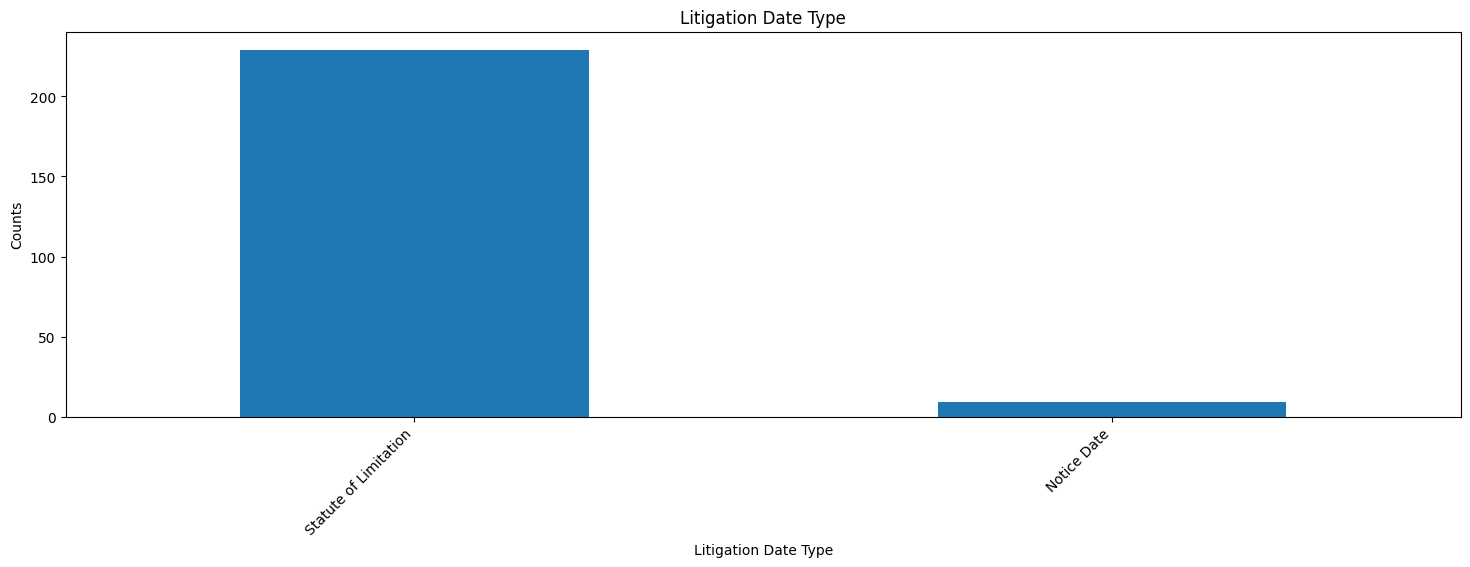

In [97]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 5))

# Plot for Litigation Date Type
df['Litigation Date Type'].value_counts().plot(kind='bar', title='Litigation Date Type')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


"Notice Date" refers to the date on which a formal notification is given regarding a particular matter. This date is critical as it often triggers the start of various deadlines and legal timeframes.

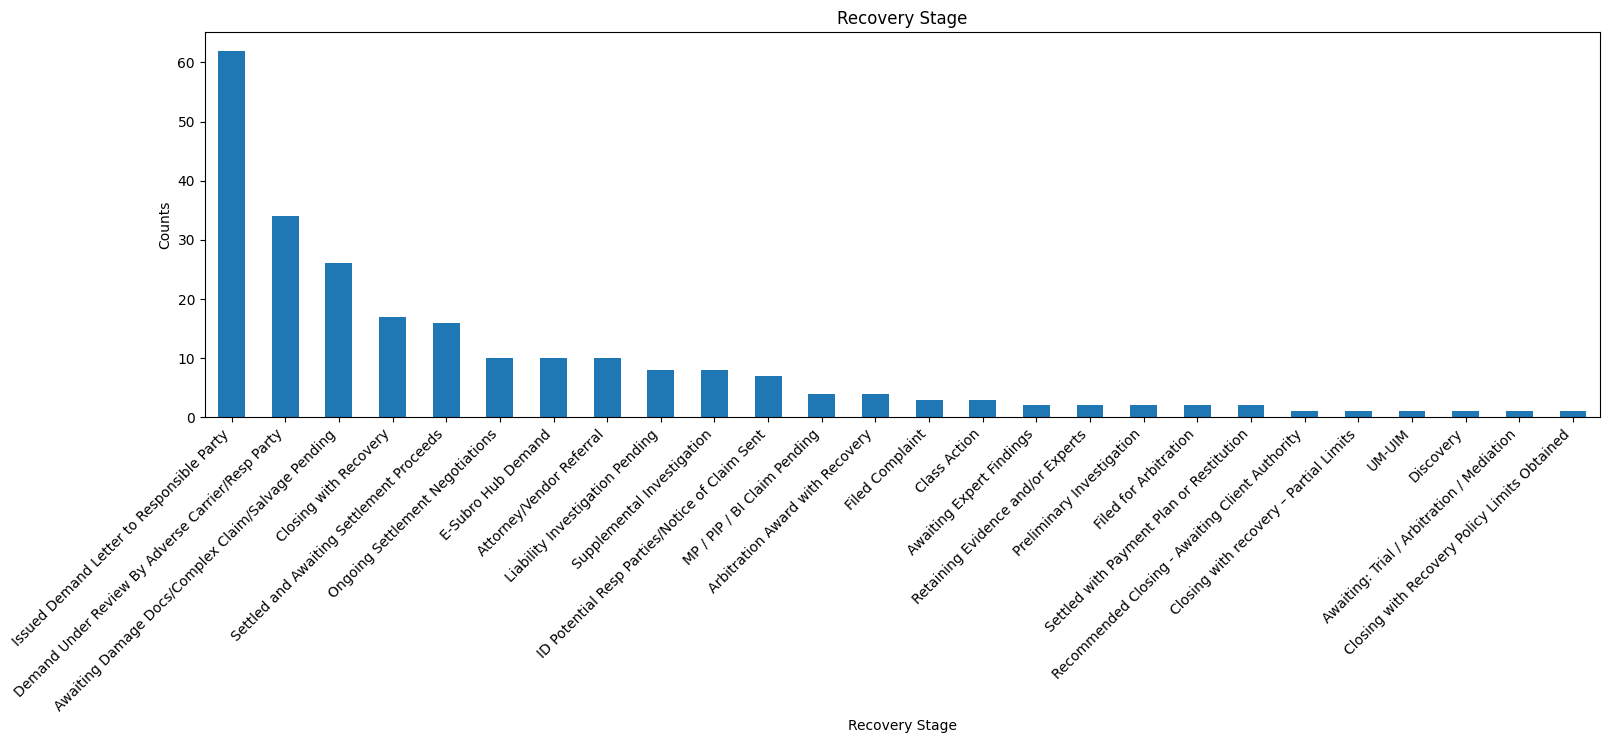

In [98]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 5))

# Plot for Litigation Date Type
df['Recovery Stage'].value_counts().plot(kind='bar', title='Recovery Stage')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

1. Issued Demand Letter to Responsible Party: This stage involves sending a formal notification to the party deemed responsible for damages or loss, demanding compensation. It's typically an initial step in the claims process.

2. Demand Under Review by Adverse Carrier/Resp Party: After a demand letter is issued, this stage signifies that the responsible party or their insurance carrier is reviewing the claim to determine liability and possibly the amount of compensation
    - Adverse Carrier - term used to refer to the other party's insurance company

3. Awaiting Damage Docs/Complex Claim: This suggests that the recovery process is on hold pending receipt of documentation that substantiates the claim's complexity or the extent of damages incurred.

4. Salvage Pending: In insurance, salvage refers to the process of recovering some value from the damaged property. This stage indicates that actions to salvage parts or all of the insured property are pending.

5. Closing within Recovery: This implies the finalization or settlement of a claim where recovery of costs or damages is anticipated or being finalized.

6. Settled and Awaiting Settlement Proceeds: This stage indicates that the terms of the settlement have been agreed upon, but the actual financial compensation or settlement proceeds have yet to be received.

7. Ongoing Settlement Negotiations: This represents ongoing discussions between the parties involved to reach a financial settlement.

8. E-Subro Hub Demand: Demand made through this specific electronic hub intended to streamline and enhance the efficiency of subrogation processes between insurance companies

9. Attorney Vendor Referral: A lawyer refers a client to another lawyer or professional

10. Liability Investigation Pending: This stage focuses on investigating the liability aspects of the claim to determine who is legally responsible for the damages or loss

11. Supplemental Investigation: Suggests additional investigations are needed, possibly to uncover more facts or review additional evidence that has come to light.

12. ID Potential Resp Parties: Figuring out who may be legally responsible for a problem or an incident

13. Notice of Claim: Formal document that informs a party of a dispute or grievance. It's a required step in many legal processes, including lawsuits, insurance claims, and employment disputes

14. Arbitration Award Recovery: Indicates that a claim or dispute has been moved to arbitration.

15. Filed Complaint: Filing a complaint is the act of formally expressing dissatisfaction with an issue and requesting action from those in authority.

16. Discovery: Crucial pre-trial phase in which parties involved in a lawsuit exchange information that is essential to the preparation of their cases

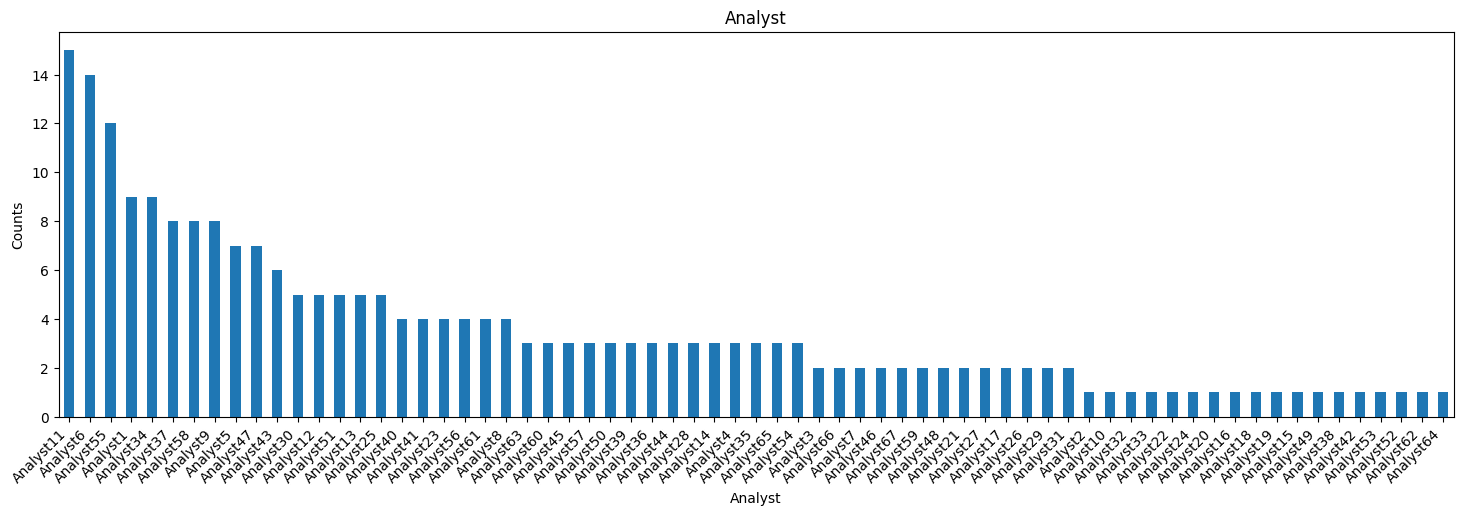

In [99]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 5))

# Plot for Litigation Date Type
df['Analyst'].value_counts().plot(kind='bar', title='Analyst')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

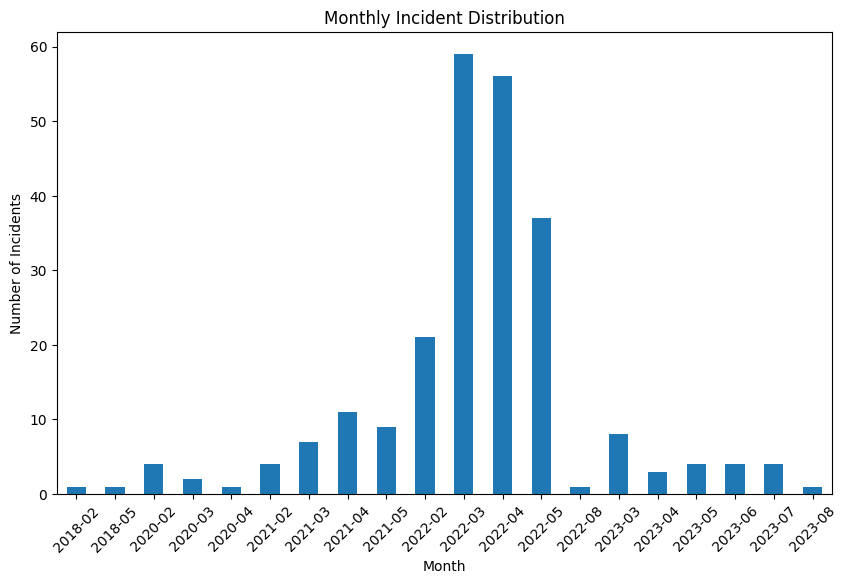

In [100]:
# Group data by month and count incidents
monthly_incidents = df['Incident Date'].dt.to_period('M').value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
monthly_incidents.plot(kind='bar')
plt.title('Monthly Incident Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


Majority of claims occurred between February to May of 2022.

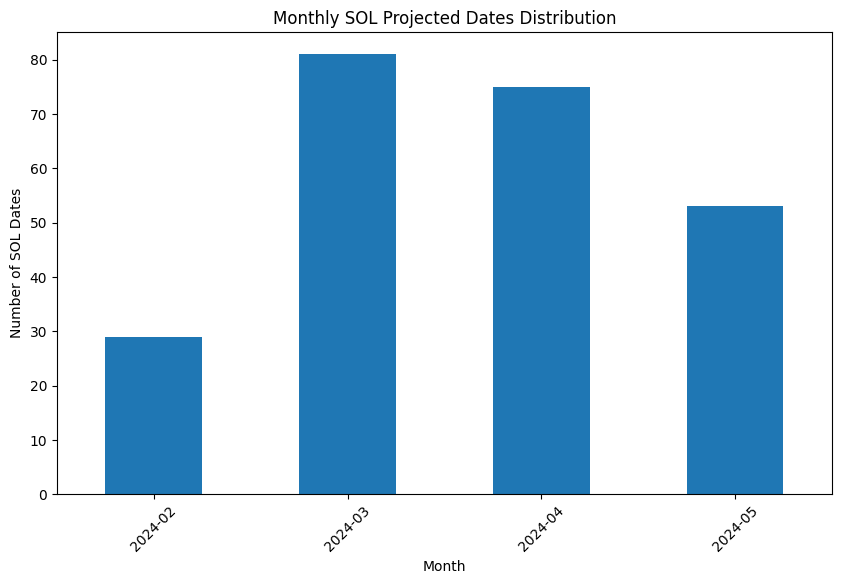

In [101]:
# Group data by month and count incidents
monthly_sol = df['SOL PD'].dt.to_period('M').value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
monthly_sol.plot(kind='bar')
plt.title('Monthly SOL Projected Dates Distribution')
plt.xlabel('Month')
plt.ylabel('Number of SOL Dates')
plt.xticks(rotation=45)
plt.show()


Majority of claims are expected to be completed within March-April of 2024.

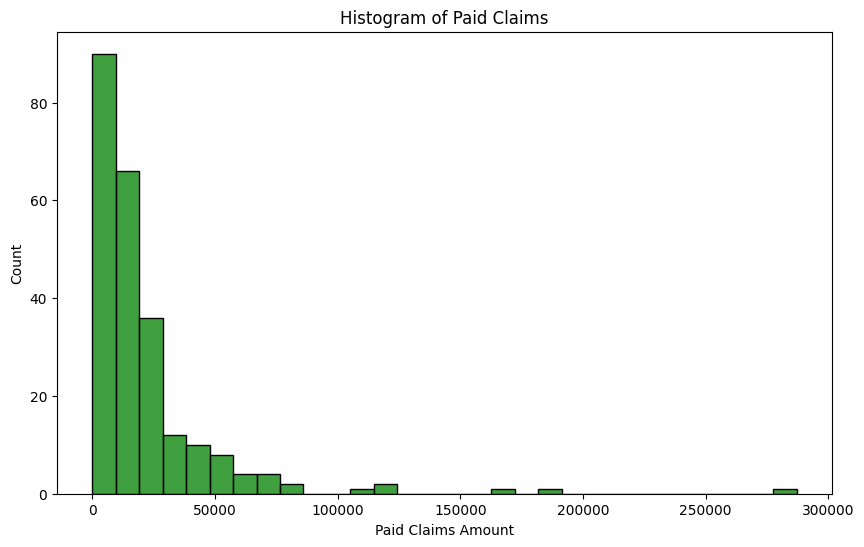

In [102]:
# Creating a histogram with seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Paid Claim'], bins=30, kde=False, color='green')  # 'kde=False' disables the density curve overlay
plt.title('Histogram of Paid Claims')
plt.xlabel('Paid Claims Amount')
plt.ylabel('Count')
plt.show()


Majority of claims have paid claims that are less than $50k.

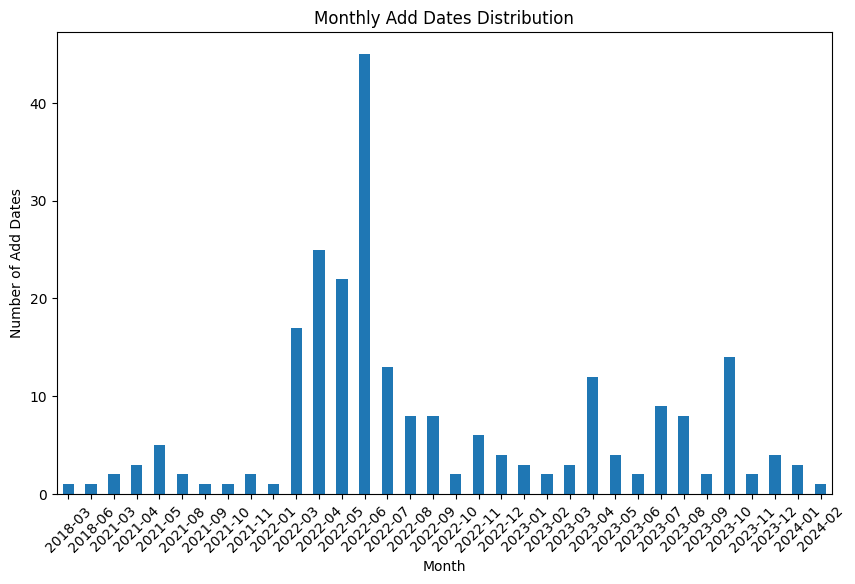

In [103]:
# Group data by month and count incidents
add_date = df['Add Date'].dt.to_period('M').value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
add_date.plot(kind='bar')
plt.title('Monthly Add Dates Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Add Dates')
plt.xticks(rotation=45)
plt.show()


Majority of claims are added between January-May 2022, with the highet being in May of 2022.

## Visualize Data Relationships

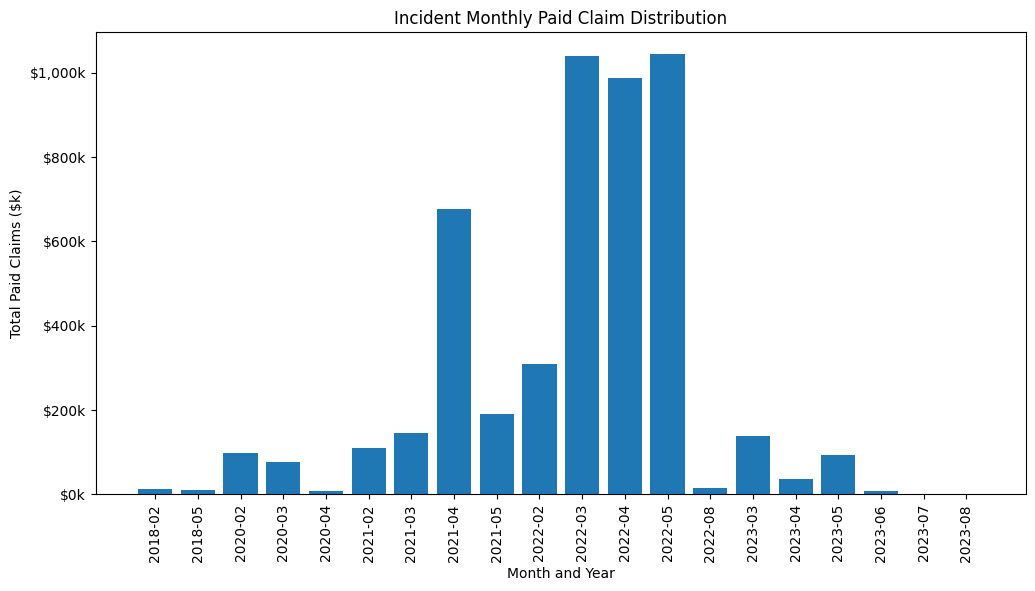

In [104]:
import matplotlib.ticker as mtick
# Group data by month and sum 'Paid Claim'
monthly_claims = df.groupby(df['Incident Date'].dt.to_period('M'))['Paid Claim'].sum()

# Ensure the index is sorted (if not already)
monthly_claims = monthly_claims.sort_index()

# Plotting
plt.figure(figsize=(12, 6)) 

plt.bar(monthly_claims.index.strftime('%Y-%m'), monthly_claims.values / 1000)  # Divide by 1000 to convert to thousands

# Formatting the plot
plt.title('Incident Monthly Paid Claim Distribution')
plt.xlabel('Month and Year')
plt.ylabel('Total Paid Claims ($k)')

# Formatting y-axis to show labels as dollar amounts in 'k'
fmt = '${x:,.0f}k'  # Format string for the y ticks
yticks = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

# Rotate date labels for better readability
plt.xticks(rotation=90)

plt.show()


Majority of paid claims are between March and May of 2022.

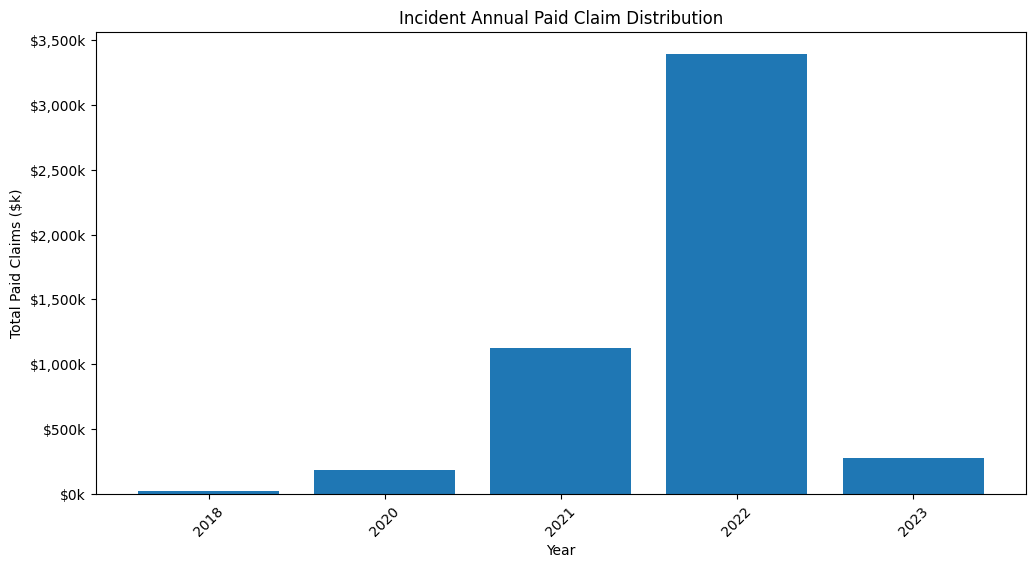

In [105]:
# Group data by year and sum 'Paid Claim'
annual_claims = df.groupby(df['Incident Date'].dt.to_period('Y'))['Paid Claim'].sum()

# Ensure the index is sorted (if not already)
annual_claims = annual_claims.sort_index()

# Plotting
plt.figure(figsize=(12, 6))  # Adjust size as necessary

plt.bar(annual_claims.index.astype(str), annual_claims.values / 1000)  # Divide by 1000 to convert to thousands

# Formatting the plot
plt.title('Incident Annual Paid Claim Distribution')
plt.xlabel('Year')
plt.ylabel('Total Paid Claims ($k)')

# Formatting y-axis to show labels as dollar amounts in 'k'
fmt = '${x:,.0f}k'  # Format string for the y ticks
yticks = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

# Rotate date labels for better readability
plt.xticks(rotation=45)  # Adjusted for better visual alignment

plt.show()


Majority of paid claims are in 2022.

In [106]:
# Ensure 'Incident Date' is a datetime type if not already
df['Incident Date'] = pd.to_datetime(df['Incident Date'])
df['Incident Year'] = df['Incident Date'].dt.year

#Filter the DataFrame for years 2021, 2022, and 2023
filtered_df = df[df['Incident Year'].isin([2021, 2022, 2023])]


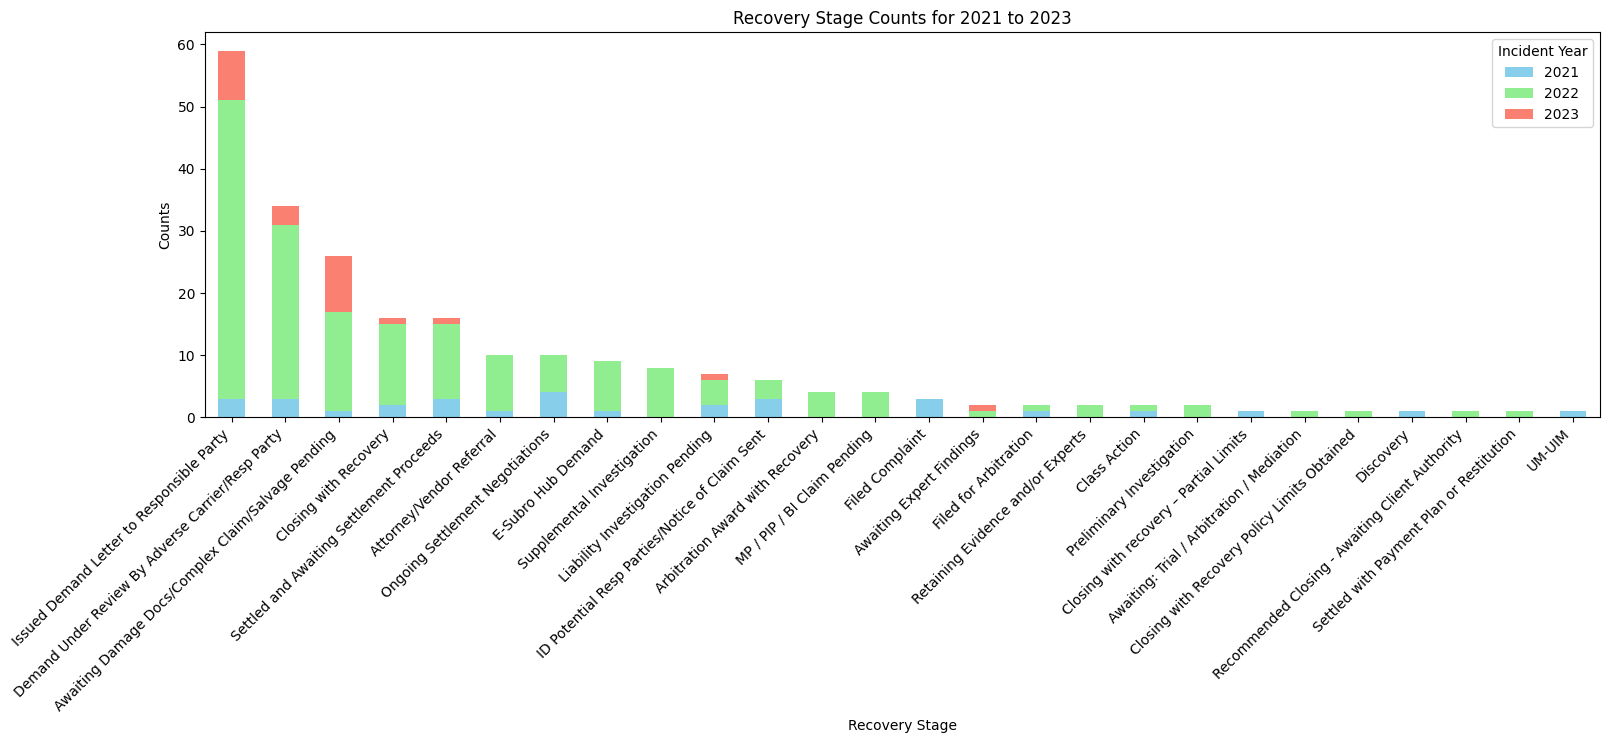

In [107]:
# Create a cross-tabulation of counts for each Recovery Stage and Year
recovery_counts = pd.crosstab(filtered_df['Recovery Stage'], filtered_df['Incident Year'])

# Add a 'Total' column to sort by
recovery_counts['Total'] = recovery_counts.sum(axis=1)

# Sort by total counts in descending order
recovery_counts_sorted = recovery_counts.sort_values('Total', ascending=False)

# Drop the 'Total' column for plotting
recovery_counts_sorted = recovery_counts_sorted.drop(columns='Total')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 5))

# Define colors for each year for clarity and consistency
colors = ['skyblue', 'lightgreen', 'salmon']  # Colors for 2021, 2022, and 2023

# Plot stacked bar chart for recovery stage counts
recovery_counts_sorted.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Set titles and labels
ax.set_title('Recovery Stage Counts for 2021 to 2023')
ax.set_xlabel('Recovery Stage')
ax.set_ylabel('Counts')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In 2022, the majority of claims seem to concentrate in the early stages of the recovery process. Notably, stages like "Issued Demand Letter to Responsible Party" and "Demand Under Review by Adverse Carrier/Resp Party" have relatively higher counts compared to other stages. Although some claims are at later stages, such as "Closing with Recovery", "Liability Investigation Pending", and "Arbitration Award Pending".

2021 and 2023 shows fewer claims than 2022. Majority of 2023 claims are at earlier and middle stages, notably "Issued Demand Letter to Responsible Party" and "Awaiting Damage Docs/Complex Claim/Salvage Pending". There are little more claims that occurred in 2021, being more spread on different kinds of early stages.

Majority of claims occurred in the intiial stages, and then decrease in numbers at later stages. This could mean that the majority of claims have either been resolved or pending.

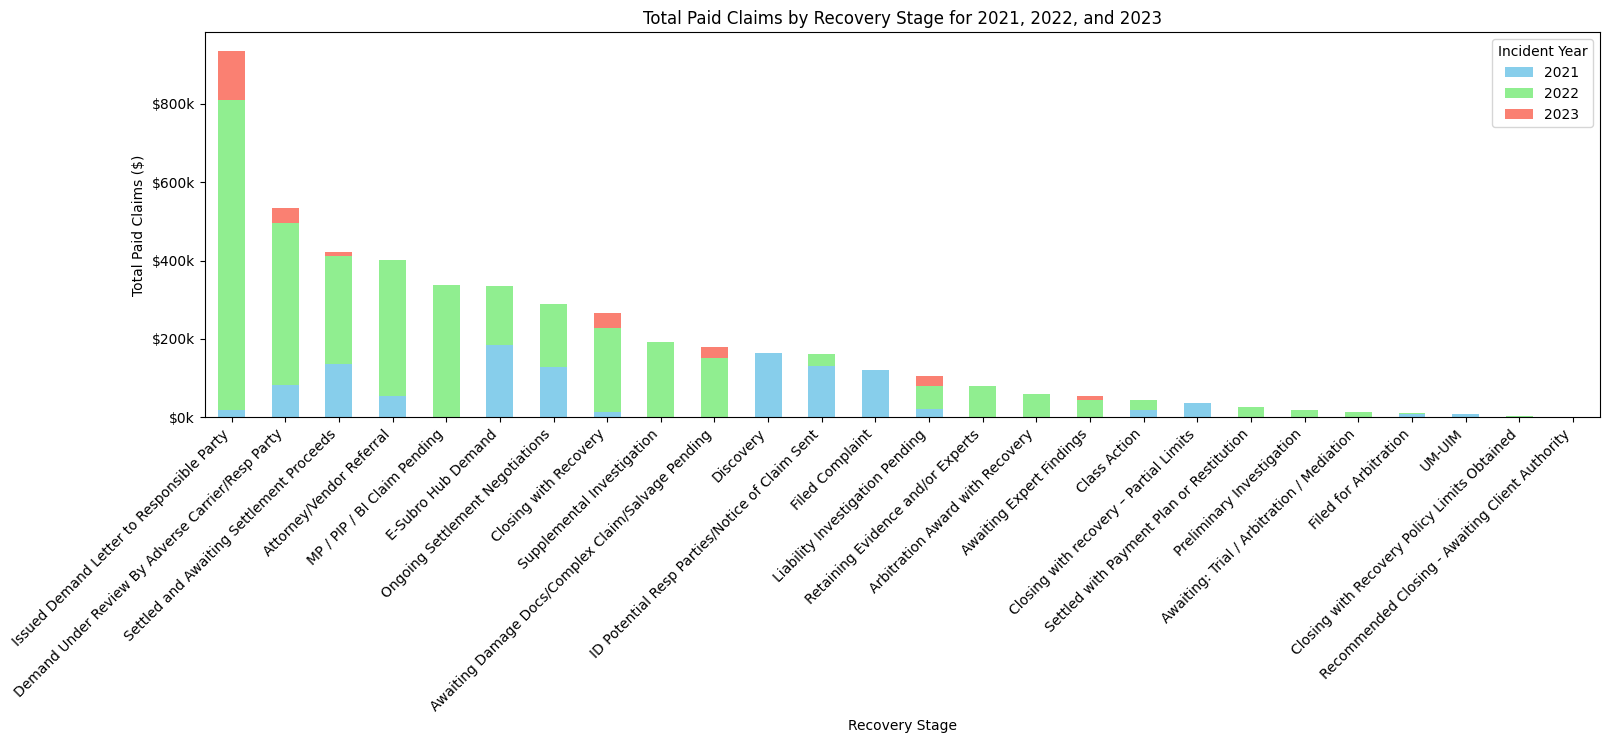

In [108]:
from matplotlib.ticker import FuncFormatter

# Assuming filtered_df is already set up and filtered for 2021, 2022, 2023
# Aggregate data manually using groupby
aggregated_data = filtered_df.groupby(['Recovery Stage', 'Incident Year'])['Paid Claim'].sum().unstack(fill_value=0)

# Sort by the total paid claims across all included years
aggregated_data['Total'] = aggregated_data.sum(axis=1)
aggregated_data_sorted = aggregated_data.sort_values('Total', ascending=False)
aggregated_data_sorted.drop(columns='Total', inplace=True)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 5))

# Define colors for each year for clarity and consistency
colors = ['skyblue', 'lightgreen', 'salmon']  # Colors for 2021, 2022, and 2023

# Stacking the years 2021, 2022, and 2023
aggregated_data_sorted.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Adding titles and labels
ax.set_title('Total Paid Claims by Recovery Stage for 2021, 2022, and 2023')
ax.set_xlabel('Recovery Stage')
ax.set_ylabel('Total Paid Claims ($)')

# Formatter function to convert y-axis values to '$xxxk'
def k_formatter(x, pos):
    return f'${x * 1e-3:,.0f}k'

# Apply formatter to y-axis
ax.yaxis.set_major_formatter(FuncFormatter(k_formatter))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


The total paid claims show similar trends across recovery stages as frequency of each stages in 2021-2023, with the majority of paid claims in 2022 being at earlier stages, very few 2023 paid claims at some earlier stages, and a few 2021 paid claims occurring in some early stages. 

This suggests that settlements or claim payments occur in the early recovery process. Particular stages, such as "Issued Demand Letter to Responsible Party" and "Demand Under Review by Adverse Carrier/Resp Party", could suggest that these stages usually require significant amount of payment in order to go through these stages. Stages in the second half of the graph could imply that  they either don't have as much of payment value compared to the ones in the first half, or very few claims have processes that contain these stages.

The significance of a claim often influences the total compensation paid out. Less significant claims generally result in smaller payouts, while more substantial claims, which involve greater issues or impacts, tend to lead to higher payouts.

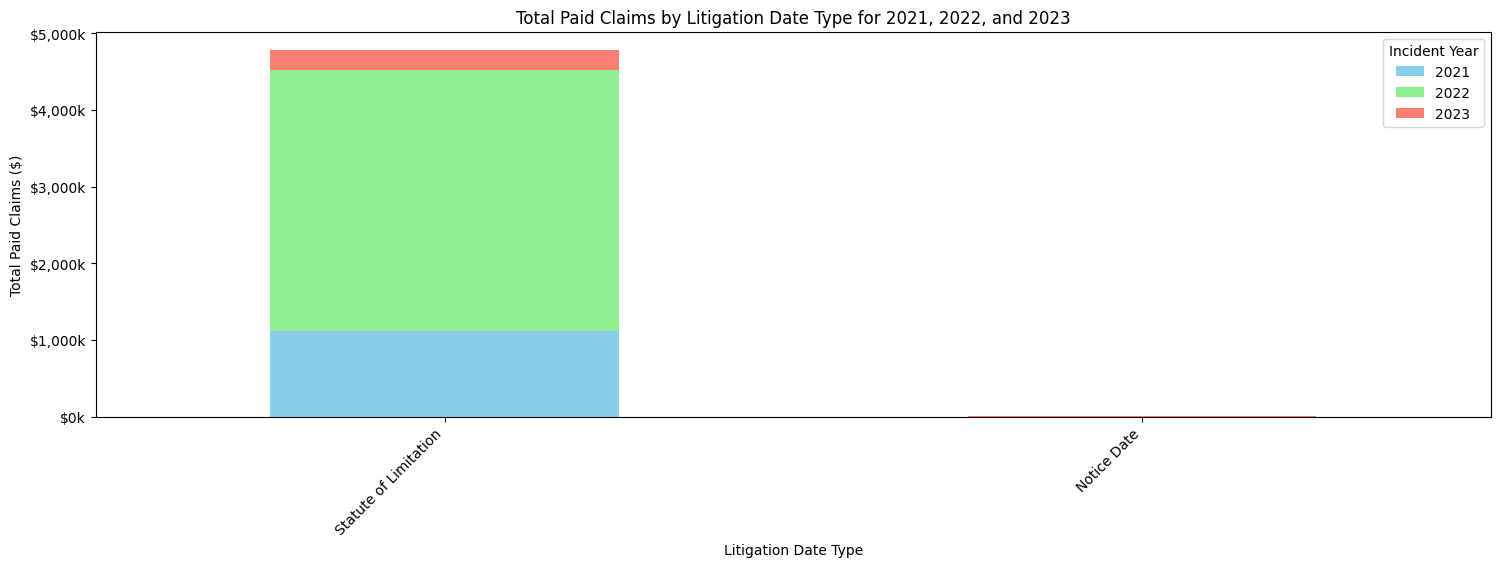

In [109]:
# Assuming filtered_df is already prepared and filtered for the years 2021, 2022, and 2023
# Manually aggregate data using groupby
aggregated_data = filtered_df.groupby(['Litigation Date Type', 'Incident Year'])['Paid Claim'].sum().unstack(fill_value=0)

# Sorting by the total paid claims across all included years
aggregated_data['Total'] = aggregated_data.sum(axis=1)
aggregated_data_sorted = aggregated_data.sort_values('Total', ascending=False)
aggregated_data_sorted.drop(columns='Total', inplace=True)  # Remove the 'Total' column for plotting

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 5))

# Define colors for each year for clarity and consistency
colors = ['skyblue', 'lightgreen', 'salmon']  # Colors for 2021, 2022, and 2023

# Stacking the years 2021, 2022, and 2023
aggregated_data_sorted.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Adding titles and labels
ax.set_title('Total Paid Claims by Litigation Date Type for 2021, 2022, and 2023')
ax.set_xlabel('Litigation Date Type')
ax.set_ylabel('Total Paid Claims ($)')

# Formatter function to convert y-axis values to '$xxxk'
def k_formatter(x, pos):
    return f'${x * 1e-3:,.0f}k'

# Apply formatter to y-axis
ax.yaxis.set_major_formatter(FuncFormatter(k_formatter))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


Statute of Limitation correlates with almost all claims.

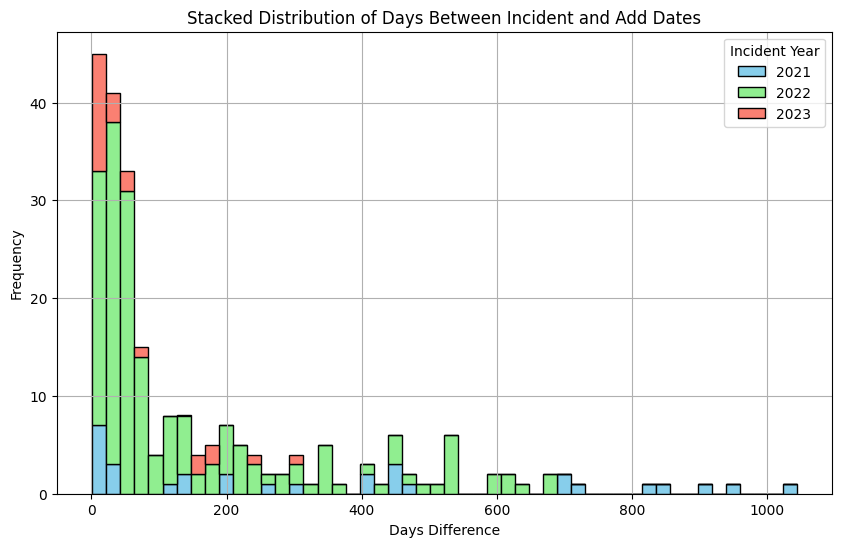

In [110]:
# Plotting
plt.figure(figsize=(10, 6))

# Define colors for clarity in the stacked histogram
colors = ['skyblue', 'lightgreen', 'salmon']  # Define colors for each year
years = [2021, 2022, 2023]

# First, sort the dataframe to ensure the stacking order is consistent
df.sort_values(by='Incident Year', inplace=True)

# Calculate the difference in days between 'Add Date' and 'Incident Date'
df['Days Difference'] = (df['Add Date'] - df['Incident Date']).dt.days

# Using hist with stacked=True
plt.hist([df[df['Incident Year'] == year]['Days Difference'] for year in years],
         bins=50, stacked=True, color=colors, edgecolor='black', label=[f'{year}' for year in years])

plt.title('Stacked Distribution of Days Between Incident and Add Dates')
plt.xlabel('Days Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(title='Incident Year')
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_36920\1192631459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Days Difference'] = (df['Add Date'] - df['Incident Date']).dt.days
C:\Users\nguye\AppData\Local\Temp\ipykernel_36920\1192631459.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Binned Days'] = pd.cut(filtered_df['Days Difference'], bins=bins, labels=[f"{int(left)}-{int(left+bin_width)-1}" for left in bins[:-1]])
C:\Users\nguye\AppData\Local\Temp\ipykernel_36920\119263

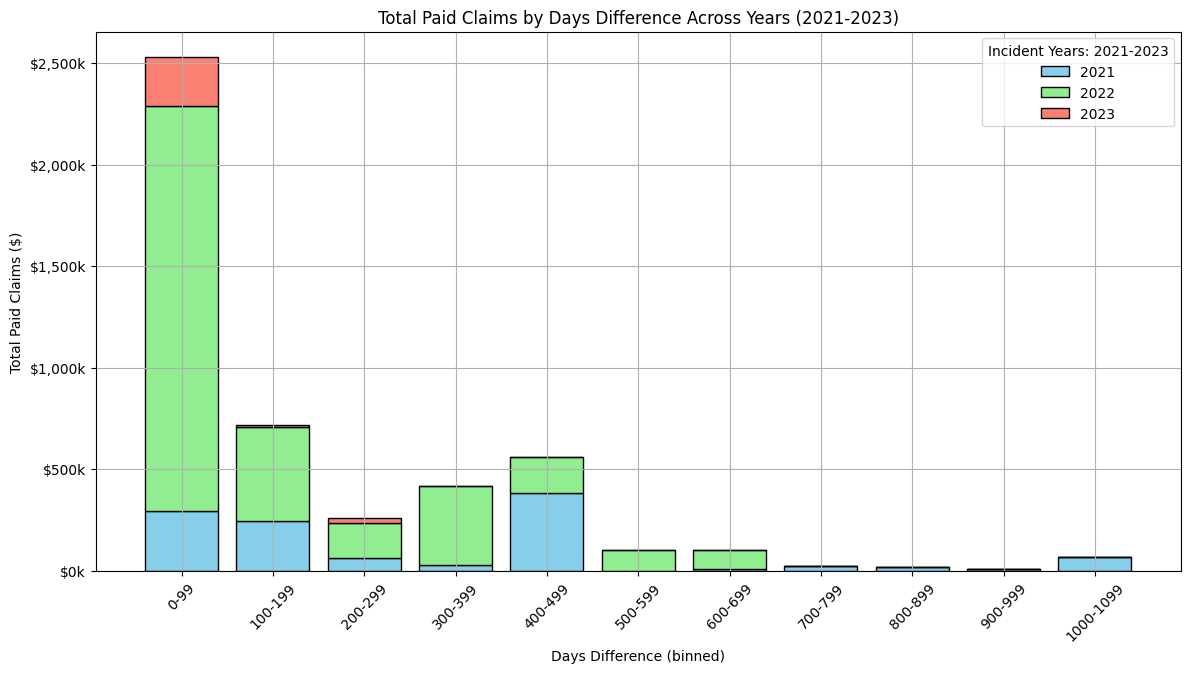

In [111]:
# Calculate the difference in days between 'Add Date' and 'Incident Date'
filtered_df['Days Difference'] = (df['Add Date'] - df['Incident Date']).dt.days

# Define bins for 'Days Difference'
bin_width = 100  # Adjust bin width to spread out data points and match screenshot style
bins = range(0, filtered_df['Days Difference'].max() + bin_width, bin_width)
filtered_df['Binned Days'] = pd.cut(filtered_df['Days Difference'], bins=bins, labels=[f"{int(left)}-{int(left+bin_width)-1}" for left in bins[:-1]])

# Aggregate paid claims within these bins by year
grouped = filtered_df.groupby(['Binned Days', 'Incident Year'])['Paid Claim'].sum().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 7))  # Set figure size to make the plot more readable

# Define a formatter function for the y-axis to display values in 'k' and add dollar sign with commas
def k_formatter(x, pos):
    return f'${x * 1e-3:,.0f}k'  # Adjusted to include commas

# Define colors for the bars to match the screenshot
colors = ['skyblue', 'lightgreen', 'salmon']  # Colors should be repeated or reassigned if incorrect in the initial setup

# Calculate the bottom values for each stack
bottoms = np.zeros(len(grouped))

# Stack the bars
for year, color in zip(sorted(grouped.columns), colors):
    plt.bar(grouped.index, grouped[year], bottom=bottoms, color=color, edgecolor='black', label=f'{year}', width=0.8)
    bottoms += grouped[year].values  # Update the bottoms for stacking

# Customize the plot to match desired aesthetics
plt.title('Total Paid Claims by Days Difference Across Years (2021-2023)')
plt.xlabel('Days Difference (binned)')
plt.ylabel('Total Paid Claims ($)')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(k_formatter))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Incident Years: 2021-2023')  # Update legend to reflect the range of years
plt.grid(True)  # Add grid for better alignment

plt.show()


The majority of claims have day difference between incident and add dates less than 100. The higher differences are from 2021 claims, and the majority of the lower differences are from 2022. 2021 claims are more spread out in terms of the groupings of the differences. Day differences may not be a main factor to the high paid claims within 2022.

## Recommendations for Next Steps

The main recommended next objective is to address the spike in incidents and the associated paid claims observed during February to May 2022.

Some of the steps that are recommended to take to work on this objective include:
1. Incident Categorization: Break down the incidents by category to see if specific categories are contributing disproportionately to the spike.
    - If there are, conduct a detailed review of the financial impact of these incidents. Which types of claims were most costly? This could help prioritize areas for immediate intervention. Then, assess current insurance covers and claims processes to identify potential improvements or areas where coverage might need to be enhanced.
2. Internal Factors: Evaluate internal operational factors such as changes in workforce or policy shifts during these months and year that might have contributed to the rise in incidents.
3. External Factors: Consider external influences like economic downturns, regulatory changes, or environmental factors. For instance, severe weather conditions can often lead to higher incidents in certain industries.
    - This could be further investigated by reviewing the geographical distribution of the incidents. Certain regions might be more affected during these months due to local factors.
4. Historical Comparisons: Compare this period with any similar past events. Understanding how these were managed and what the outcomes were can provide valuable lessons.
    - Then, evaluate the effectiveness of measures taken in response to past incidents. This will help in refining current strategies.
5. Employee Feedback: Interview employees and management to gain insights into what they believe might be causing the increase. This might uncover issues not visible through data analysis alone.
6. Customer Feedback: If applicable, gather feedback from customers or end-users affected by these incidents. They might provide a perspective that internal data does not capture.
7. Preventative Measures: Develop or enhance preventative measures based on the findings. This could include training, better safety protocols, or enhanced risk management strategies.
8. Monitoring Systems: Implement or upgrade existing systems for better monitoring and reporting of incidents as they occur.
9. Continuous Improvement: Regularly review the outcomes of implemented measures and adjust strategies as needed based on what is or isn’t working. Also establish feedback loops with all stakeholders involved to ensure that all perspectives are considered in ongoing incident management strategies.